# PSP Automated Magnetic Hole Finder
## By: Robert Alexander + Jaye Verniero


### 0.1) Import Packages, Define Helper Functions, and Set Save Directory

In [1]:
# Cell 1: Imports and Initial Configuration

# --- Plotbot Core Imports ---
try:
    from plotbot import print_manager as pm
    # Configure Print Manager Verbosity (adjust as needed for debugging)
    pm.show_error = True
    pm.show_warnings = True
    pm.show_status = True     # Good for seeing high-level progress
    pm.show_debug = False     # Set to True for very detailed internal Plotbot logs
    pm.show_datacubby = False # Set to True to debug DataCubby interactions
    pm.show_processing = False# Set to True for Plotbot data processing steps
    print("✅ Successfully imported and configured Plotbot's print_manager.")
except ImportError:
    print("⚠️ Could not import Plotbot's print_manager. Some log messages may be missing.")
    pm = None

# Import for direct data loading/populating DataCubby & the specific global instances
from plotbot import get_data as plotbot_get_data 
from plotbot import mag_rtn  # For MAG_RTN data (1 sample/cycle)
from plotbot import config
# from plotbot import mag_rtn_4sa # If you also need 4sa MAG data in snapshots
# from plotbot import proton      # Example: if you want proton data
# from plotbot import epad        # Example: if you want electron PAD data

# Import for snapshotting
from plotbot.data_snapshot import save_data_snapshot, load_data_snapshot

# --- Local Application Imports ---
# For running your analysis algorithm
from magnetic_hole_finder.magnetic_hole_finder_core import HoleFinderSettings, detect_magnetic_holes_and_generate_outputs

# --- Standard Library Imports ---
import os
import json # For settings files, though core function handles its own now
from datetime import datetime
from collections import Counter # For handling the returned counter from analysis

# --- Third-Party Data Science Libraries (primarily for ad-hoc notebook use if needed) ---
import numpy as np 
import pandas as pd
# import matplotlib.pyplot as plt # If doing custom plots in the notebook

# --- Warnings Handling ---
from warnings import simplefilter
import warnings
simplefilter(action='ignore', category=DeprecationWarning) # Ignore general deprecation warnings
warnings.filterwarnings("ignore", message="invalid value encountered in divide") # Example specific warning
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide") # Example
warnings.filterwarnings("ignore", category=DeprecationWarning, module="IPython.core.pylabtools") # For IPython

# --- Final Import Confirmation ---
current_time_consolidated = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(f'{current_time_consolidated} - 📚 All libraries imported and environment configured.')


🕒 Starting import timing session: plotbot_full_initialization
  ✅ matplotlib.pyplot: 0.249s
  ✅ numpy: 0.000s
  🔧 Starting block: core_components
initialized server_access
initialized global_tracker
initialized ploptions
initialized plot_manager
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized ham_class
initialized psp_alpha class
initialized psp_qtn class
initialized psp_orbit class
initialized psp_span_vdf class
initialized data_cubby.
CDF classes added to data_cubby type map.
  ✅ Block 'core_components' completed in 0.696s
  🔧 Starting block: psp_data_classes
initialized proton_fits class
initialized alpha_fits class
  ✅ Block 'psp_data_classes' completed in 0.001s
  🔧 Starting block: wind_data_classes
  ✅ Block 'wind_data_classes' completed in 0.000s
  🔧 Starting block: data_cubby_registration
  ✅ Block 'data_cubby_registration' completed in 0.001s
  🔧 Starting block: auto_register_custom_classes
  ✅ Block 'auto_regi

In [2]:
# ------- 💽 CONFIGURE THE DEFAULT DATA DIRECTORY 💽 -------//
# This must be set before pyspedas is imported/run, as pyspedas caches configuration at import time.

config.data_dir = '../data'  # Go up one level to Plotbot/data/

import os
print(f"📁 Data directory absolute path: {os.path.abspath(config.data_dir)}")

# ------- 📡 CONFIGURE THE DEFAULT DATA SERVER 📡 -------//

# config.data_server = 'spdf'
config.data_server = 'berkeley'
# config.data_server = 'dynamic' #Will attempt to download from spdf first and then try berkeley

# ------- 🖨️ CONFIGURE PRINT MANAGER 🖨️ -------//
pm.show_status = True
# pm.show_debug = True      # Optional: uncomment for maximum detail
# pm.show_processing = True # Optional: uncomment for processing steps
# pm.show_datacubby = True  # Optional: uncomment for data caching steps


📁 Plotbot data directory changed: data → ../data
🔧 SPEDAS_DATA_DIR updated for pyspedas compatibility
📁 Data directory absolute path: /Users/robertalexander/GitHub/Plotbot/data


### Load The Snapshot!

In [3]:
# load_data_snapshot('Magnetic_Hole_Multi_Encounter_Snapshot.pkl') 

In [4]:
import os
print(f"Working directory: {os.getcwd()}")
print(f"SPEDAS_DATA_DIR: {os.environ.get('SPEDAS_DATA_DIR', 'NOT_SET')}")
print(f"config.data_dir: {config.data_dir}")

Working directory: /Users/robertalexander/GitHub/Plotbot/example_notebooks
SPEDAS_DATA_DIR: /Users/robertalexander/GitHub/Plotbot/data
config.data_dir: ../data


🚀 Initiating multi-panel showda_holes for 4 panels.
--- Processing Panel 1/4 ---
Panel: Plotting mag_rtn_4sa.bmag vs epad.centroids
Parsed 106 hole intervals from /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E17/E17_PSP_FIELDS_2023-09-28_053200_to_074500_Bmag_Holes/PSP_MH_Marker_Set_E17_2023-09-28_053200_to_074500_V3_MAX_AND_MIN.txt
Panel: Calling get_data for needed variables.
🛰️ spe_sf0_pad - acquiring variables: centroids
🛰️ mag_RTN_4sa - acquiring variables: bmag
Attempting Berkeley acquisition path for spe_sf0_pad...
📡 spe_sf0_pad - A local .cdf file already exists:
📂 ../data/psp/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_l3_pad_20230928_v04.cdf
☑️ - CDF Data import complete for spe_sf0_pad range ['2023-09-28 06:32:00', '2023-09-28 06:45:00'].

📥 Requesting DataCubby to update/merge global instance for epad...
✅ DataCubby processed update for epad.
Attempting Berkeley acquisition path for mag_RTN_4sa...
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 ../data/psp/fie

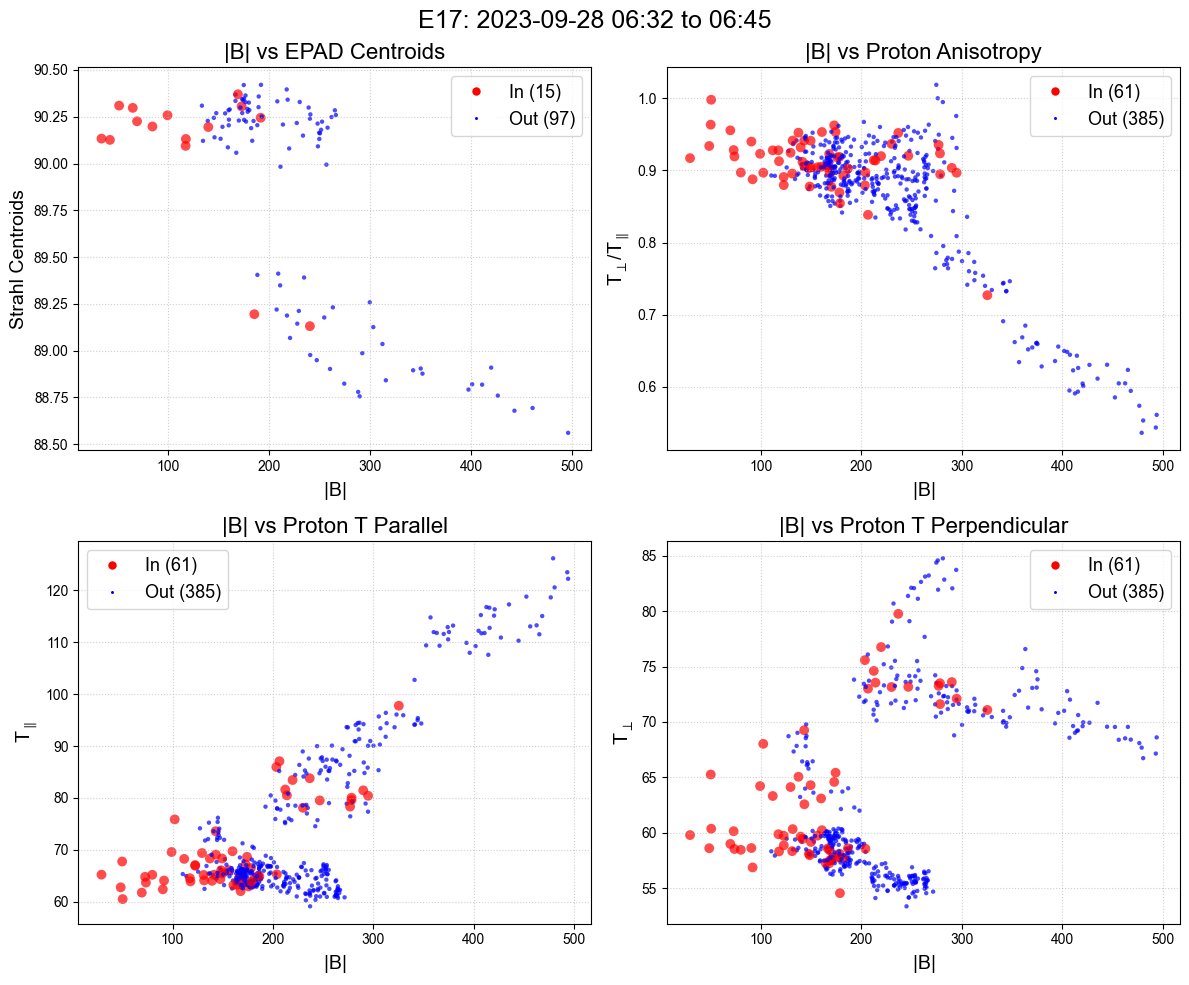

✅ Multi-panel hodogram displayed.
Multi-panel plot generated. axes shape: (2, 2)


In [5]:
# --- Common Setup ---
# Ensure necessary data modules are imported
from plotbot import epad, mag_rtn_4sa, proton, showda_holes

trange_E9 = ['2021-08-10 00:00:00', '2021-08-10 02:00:00']
trange_E10 = ['2021-11-22 00:30:00', '2021-11-22 03:30:00']
trange_E11 = ['2022-02-25 12:00:00', '2022-02-25 13:00:00']
trange_E15_1 = ['2023-03-16 02:15:00', '2023-03-16 02:30:00']
trange_E15_2 = ['2023-03-17 20:30:00', '2023-03-17 21:45:00']
trange_E15_2_tight = ['2023-03-17 21:05:00', '2023-03-17 21:15:00']
trange_E17 = ['2023-09-28 06:32:00', '2023-09-28 06:45:00']
trange_E17_w = ['2023-09-28 06:00:00', '2023-09-28 07:30:00']

# trange = trange_E15_2_tight
# Or any other trange you want to test
# --- Select active time range ---
# trange = trange_E9
# trange = trange_E10
# trange = trange_E11
# trange = trange_E15_1
# trange = trange_E15_2
# trange = trange_E17
trange = trange_E17


mh_marker_file_path = "/Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E17/E17_PSP_FIELDS_2023-09-28_053200_to_074500_Bmag_Holes/PSP_MH_Marker_Set_E17_2023-09-28_053200_to_074500_V3_MAX_AND_MIN.txt"
# mh_marker_file_path = "/Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_203000_to_214500_Bmag_Holes/PSP_MH_Marker_Set_E15_2023-03-17_203000_to_214500_V3_MAX_AND_MIN.txt"


# Optional: Turn on debug prints if needed
# pm.show_debug = True

# --- Define the panel definitions (REQUIRED for multi-panel mode) ---
# *** Panel Order Updated ***
panel_defs = [
    # --- Panel 1: Upper Left (|B| vs EPAD Centroids) --- <<< MOVED HERE
    {'x_data': mag_rtn_4sa.bmag, 'y_data': epad.centroids, 'marker_file': mh_marker_file_path, 'title': '|B| vs EPAD Centroids'}, 
    # --- Panel 2: Upper Right (|B| vs Anisotropy) --- <<< Was Panel 1
    {'x_data': mag_rtn_4sa.bmag, 'y_data': proton.anisotropy, 'marker_file': mh_marker_file_path, 'title': '|B| vs Proton Anisotropy'}, 
    # --- Panel 3: Lower Left (|B| vs Proton T Parallel) ---
    {'x_data': mag_rtn_4sa.bmag, 'y_data': proton.t_par, 'marker_file': mh_marker_file_path, 'title': '|B| vs Proton T Parallel'},
    # --- Panel 4: Lower Right (|B| vs Proton T Perpendicular) ---
    {'x_data': mag_rtn_4sa.bmag, 'y_data': proton.t_perp, 'marker_file': mh_marker_file_path, 'title': '|B| vs Proton T Perpendicular'} 
]



proton.energy_flux
proton.phi_flux

# --- Call showda_holes using panel_definitions ---
fig, axes = showda_holes(
    # --- Required Arguments for Multi-Panel ---
    trange,                   # Your time range list
    panel_definitions=panel_defs, # The list of panel definitions from above

    # --- Optional Global Keyword Arguments (Defaults shown) ---
    # main_title=None,             # Default: Auto-generates "Encounter: Start to End". Provide string to override.
    main_title_fontsize=18,    # Default: base_fontsize + 4. Provide integer to override.
    main_title_y=0.98,           # Default: 0.98 (near top). Use e.g., 0.95 to move down.
    # --- Other KWARGS passed to _plot_single_hodogram_panel as defaults ---
    # figsize=(14, 10),            # Default adjusts based on panel number. Example: (14, 10)
    base_fontsize=14             # Default: 12. Example: 10
    # x_label=None,                # Default X label if not set in panel_def (tries data object)
    # y_label=None,                # Default Y label if not set in panel_def (tries data object)
    # inside_color='red',          # Default color for points inside holes
    # outside_color='blue',        # Default color for points outside holes
    # inside_size=50,              # Default marker size for points inside holes
    # outside_size=10,             # Default marker size for points outside holes
    # alpha=0.7,                   # Default marker transparency (0.0 to 1.0)
)

# --- Check and Use Result ---
if fig and axes is not None:
    print(f"Multi-panel plot generated. axes shape: {axes.shape}")
    # You can access individual axes, e.g., axes[0, 1] for the top-right panel
else:
    print("Multi-panel showda_holes failed.")

In [6]:
import os # Ensure os is imported

# Define the main directory where all outputs will go
# This is what the user might change.
BASE_SAVE_DIRECTORY = os.path.abspath("MH_Scan_Output") # Path relative to project root
os.makedirs(BASE_SAVE_DIRECTORY, exist_ok=True) # Create it if it doesn't exist
print(f'🛟 Algorithm output base directory set to: {BASE_SAVE_DIRECTORY}')

🛟 Algorithm output base directory set to: /Users/robertalexander/GitHub/Plotbot/example_notebooks/MH_Scan_Output


In [7]:
# Cell 3: Configure HoleFinderSettings for the Run

# Instantiate settings with defaults from the class
mh_run_settings = HoleFinderSettings()

# === Customize parameters for THIS SPECIFIC RUN ===
# Values shown here are examples if you want to override the defaults 
# defined in the HoleFinderSettings class. If the default is fine, you don't need to set it here.

# --- Core Algorithm Parameters ---
mh_run_settings.INSTRUMENT_SAMPLING_RATE = 292.9 
mh_run_settings.use_calculated_sampling_rate = True
mh_run_settings.depth_percentage_threshold = 0.25
mh_run_settings.smoothing_window_seconds = 8.0
mh_run_settings.derivative_window_seconds = 0.2
mh_run_settings.min_max_finding_smooth_window = 0.3
mh_run_settings.mean_threshold = 0.8
mh_run_settings.search_in_progress_output = True  # For verbose logging during detection
mh_run_settings.additional_seconds_for_min_search = 0.2
mh_run_settings.asymetric_peak_threshold = 0.25
mh_run_settings.symmetrical_peak_scan_window_in_secs = 2.0
mh_run_settings.Bave_scan_seconds = 0.1
mh_run_settings.Bave_window_seconds = 20.0
mh_run_settings.wide_angle_threshold = 15.0
mh_run_settings.small_threshold_cross_flag_samples = 10
mh_run_settings.small_threshold_cross_adjustment_samples = 10

# --- Algorithm Breaking Condition Flags ---
mh_run_settings.break_for_shallow_hole = True
mh_run_settings.break_for_assymettry = False 
mh_run_settings.break_for_wide_angle = False 
mh_run_settings.break_for_small_threshold_cross = False
mh_run_settings.break_for_complex_hole = False 
mh_run_settings.threshold_for_derivative_0_crossings_flag = 1000
mh_run_settings.break_for_derivative_crossings = False

# --- Output Generation Control Flags (for outputs handled by the core .py function) ---
mh_run_settings.OUTPUT_MAIN_PLOT = True 
mh_run_settings.SAVE_MAIN_PLOT = True   
mh_run_settings.PLOT_HOLE_MINIMUM_ON_MAIN_PLOT = True 
mh_run_settings.PLOT_THRESH_CROSS_ON_MAIN_PLOT = True 

mh_run_settings.OUTPUT_ZERO_CROSSING_PLOT = False # For the specific plot in zero_crossing_analysis

mh_run_settings.IZOTOPE_MARKER_FILE_OUTPUT_MAX_AND_MIN = True 
mh_run_settings.IZOTOPE_MARKER_FILE_OUTPUT_GENERAL = False
mh_run_settings.MARKER_FILE_VERSION = 3
mh_run_settings.MARKER_FILES_WITH_ANNOTATED_MARKERS = False
mh_run_settings.MARKER_FILES_WITH_HOLE_NUMBERS = False

mh_run_settings.EXPORT_AUDIO_FILES = True
mh_run_settings.AUDIO_SAMPLING_RATE = 22000

mh_run_settings.download_only = False # Set to True to only download

print("HoleFinderSettings configured for this run. Current settings:")
# Pretty print the settings for verification
# import json
# print(json.dumps(mh_run_settings.__dict__, indent=4))

HoleFinderSettings configured for this run. Current settings:


In [8]:
trange_E9 = ['2021-08-10 00:00:00', '2021-08-10 02:00:00']
trange_E10 = ['2021-11-22 00:30:00', '2021-11-22 03:30:00']
trange_E11 = ['2022-02-25 12:00:00', '2022-02-25 13:00:00']
trange_E15_1 = ['2023-03-16 02:15:00', '2023-03-16 02:30:00']
trange_E15_2 = ['2023-03-17 20:30:00', '2023-03-17 21:45:00']
trange_E15_2_tight = ['2023-03-17 21:05:00', '2023-03-17 21:15:00']
trange_E17 = ['2023-09-28 06:32:00', '2023-09-28 06:45:00']
trange_E17_w = ['2023-09-28 06:00:00', '2023-09-28 07:30:00']



trange_E15_2_tighter = ['2023-03-17 21:10:0', '2023-03-17 21:11:00']
# trange_E15_2_explore = ['2023-03-17 21:10:15', '2023-03-17 21:10:20']

TIME_RANGE_TO_ANALYZE = trange_E15_2_tighter
# Or any other trange you want to test



print(f"Starting analysis for trange: {TIME_RANGE_TO_ANALYZE}...")
print(f"Outputs will be saved within base directory: {BASE_SAVE_DIRECTORY}")

# The main call to the refactored orchestrator function
# It now handles sub_save_dir creation, detection, and all standard outputs internally.
analysis_results = detect_magnetic_holes_and_generate_outputs(
    TIME_RANGE_TO_ANALYZE,
    BASE_SAVE_DIRECTORY, # Pass the top-level save directory
    mh_run_settings      # Pass the configured settings object
)

# The function returns the primary scientific results for optional inspection
if analysis_results:
    magnetic_holes, hole_minima, hole_maxima_pairs, times_clipped, bmag, magnetic_hole_details, returned_hole_counter = analysis_results
    print(f"\n✅ Analysis complete. {returned_hole_counter.get('confirmed', 0)} holes confirmed.")
    # You can still do a quick print of the counter here
    print("\n--- Magnetic Hole Detection Summary (from returned counter) ---")
    for key, value in returned_hole_counter.items():
        print(f"{key}: {value}")
    print("---------------------------------------------------------------")
    print(f"All outputs (plots, markers, settings JSON) saved in the run-specific subdirectory.")
else:
    print("Analysis aborted or returned no results (check logs for errors).")


Starting analysis for trange: ['2023-03-17 21:10:0', '2023-03-17 21:11:00']...
Outputs will be saved within base directory: /Users/robertalexander/GitHub/Plotbot/example_notebooks/MH_Scan_Output
Starting analysis for trange: ['2023-03-17 21:10:0', '2023-03-17 21:11:00']. Download_only mode: False
Entering setup_output_directory with base_save_dir: /Users/robertalexander/GitHub/Plotbot/example_notebooks/MH_Scan_Output
Encounter directory path: /Users/robertalexander/GitHub/Plotbot/example_notebooks/MH_Scan_Output/E15
Creating encounter directory: /Users/robertalexander/GitHub/Plotbot/example_notebooks/MH_Scan_Output/E15
Final subdirectory path: /Users/robertalexander/GitHub/Plotbot/example_notebooks/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes
Exiting setup_output_directory, returning: /Users/robertalexander/GitHub/Plotbot/example_notebooks/MH_Scan_Output/E15/E15_PSP_FIELDS_2023-03-17_211000_to_211100_Bmag_Holes
✅ Outputs for this run will be saved in: /Users

🚀 Initiating single-panel showda_holes.
Panel: Plotting mag_rtn_4sa.br vs proton.anisotropy
Parsed 106 hole intervals from /Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E17/E17_PSP_FIELDS_2023-09-28_053200_to_074500_Bmag_Holes/PSP_MH_Marker_Set_E17_2023-09-28_053200_to_074500_V3_MAX_AND_MIN.txt
Panel: Target resampling interval: 0 days 00:00:01.747620480
Panel: Resampled to 446 common data points.
Panel: 61 points inside holes.
Panel: Successfully plotted mag_rtn_4sa.br vs proton.anisotropy


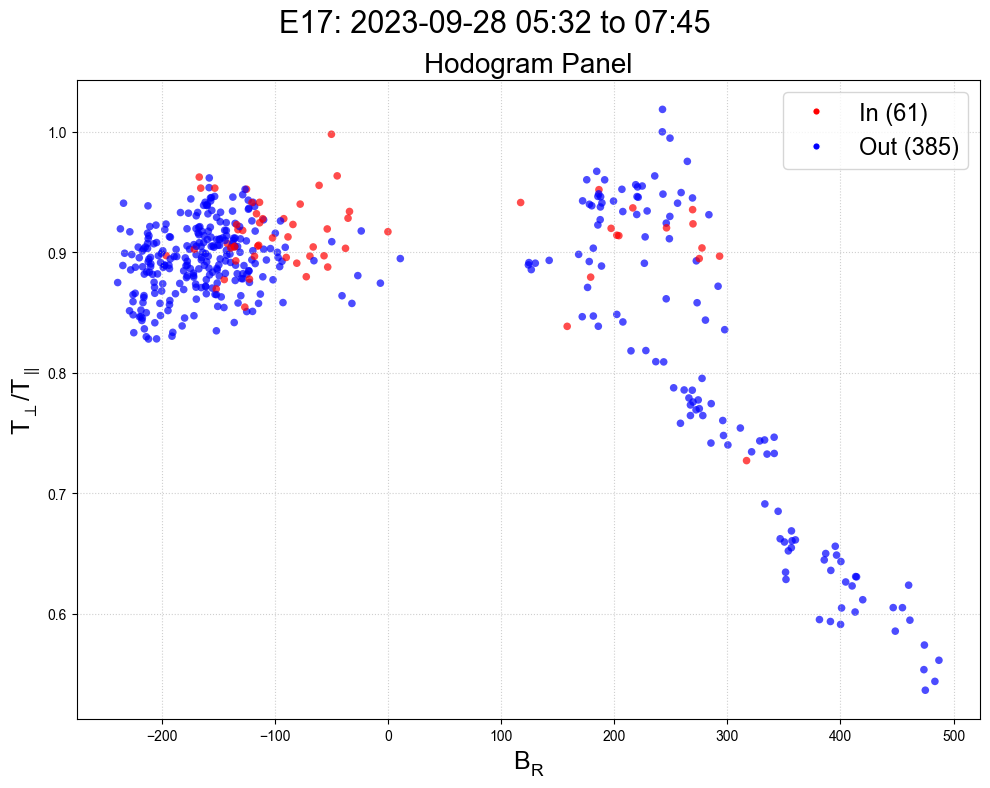

✅ Single hodogram displayed.


In [9]:
from plotbot import showda_holes
from plotbot import mag_rtn_4sa, proton # Or other data modules you need

# Define your time range
trange_E9 = ['2021-08-10 00:00:00', '2021-08-10 02:00:00']
trange_E10 = ['2021-11-22 00:30:00', '2021-11-22 03:30:00']
trange_E11 = ['2022-02-25 12:00:00', '2022-02-25 13:00:00']
trange_E15_1 = ['2023-03-16 02:15:00', '2023-03-16 02:30:00']
trange_E15_2 = ['2023-03-17 20:30:00', '2023-03-17 21:45:00']
trange_E17 = ['2023-09-28 06:32:00', '2023-09-28 06:45:00']
trange_E17_w = ['2023-09-28 05:32:00', '2023-09-28 07:45:00']

# trange = trange_E9
# trange = trange_E10
# trange = trange_E11
# trange = trange_E15_1
# trange = trange_E15_2
# trange = trange_E17
trange = trange_E17_w

#proton temp anisotropy, proton pressure, etc

mh_marker_file_path = "/Users/robertalexander/GitHub/Plotbot/MH_Scan_Output/E17/E17_PSP_FIELDS_2023-09-28_053200_to_074500_Bmag_Holes/PSP_MH_Marker_Set_E17_2023-09-28_053200_to_074500_V3_MAX_AND_MIN.txt" 

pm.show_debug = False

# Call showdahodo with the time range and two variable objects
fig, ax = showda_holes(
    # --- Required Arguments ---
    trange,                    # Your defined time range list
    mag_rtn_4sa.br,            # Your X-axis data request
    # proton.anisotropy,         # Your Y-axis data request
    # proton.beta_pperp,         # Your Y-axis data request
    proton.anisotropy,         # Your Y-axis data request
    mh_marker_file_path,       # Your marker file path

    # --- Optional Keyword Arguments (Defaults shown) ---
    # title="Hodogram with Magnetic Holes", # Uncomment and change title string if desired
    # x_label=None,                # Leave as None to use data label, or provide string e.g., "Br (nT)"
    # y_label=None,                # Leave as None to use data label, or provide string e.g., "Proton Anisotropy"
    # inside_color='red',        # Color for points inside holes
    # outside_color='blue',      # Color for points outside holes
    inside_size=30,            # Marker size for points inside holes
    outside_size=30,           # Marker size for points outside holes
    # alpha=0.7,                 # Marker transparency (0.0 to 1.0)
    # figsize=(10, 8),           # Figure size (width, height) in inches
    base_fontsize=18           # Base font size for text elements
)


# Example using mag_rtn_4sa data components:
# fig, ax = showdahodo(trange, mag_rtn_4sa.br, mag_rtn_4sa.

🕒 TimeRangeTracker: Stored trange ['2023-09-28 05:32:00', '2023-09-28 07:45:00']
🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy
🛰️ mag_RTN_4sa - acquiring variables: br
Attempting Berkeley acquisition path for spi_sf00_l3_mom...
📡 spi_sf00_l3_mom - A local .cdf file already exists:
📂 ../data/psp/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230928_v04.cdf
☑️ - CDF Data import complete for spi_sf00_l3_mom range ['2023-09-28 05:32:00', '2023-09-28 07:45:00'].

📥 Requesting DataCubby to update/merge global instance for spi_sf00_l3_mom...
✅ DataCubby processed update for spi_sf00_l3_mom.
Attempting Berkeley acquisition path for mag_RTN_4sa...
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 ../data/psp/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230928_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2023-09-28 05:32:00', '2023-09-28 07:45:00'].

📥 Requesting DataCubby to update/merge global instance for mag_rtn_4sa...
✅ DataCubb

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


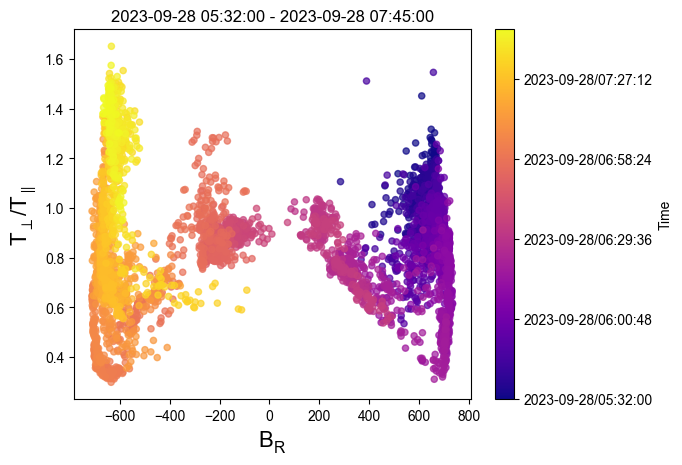

In [10]:
from plotbot import showdahodo
from plotbot import mag_rtn_4sa, proton # Or other data modules you need

# Define your time range
trange_E9 = ['2021-08-10 00:00:00', '2021-08-10 02:00:00']
trange_E10 = ['2021-11-22 00:30:00', '2021-11-22 03:30:00']
trange_E11 = ['2022-02-25 12:00:00', '2022-02-25 13:00:00']
trange_E15_1 = ['2023-03-16 02:15:00', '2023-03-16 02:30:00']
trange_E15_2 = ['2023-03-17 20:30:00', '2023-03-17 21:45:00']
trange_E17 = ['2023-09-28 06:32:00', '2023-09-28 06:45:00']
trange_E17_w = ['2023-09-28 05:32:00', '2023-09-28 07:45:00']

trange = trange_E17_w

#proton temp anisotropy, proton pressure, etc

# Call showdahodo with the time range and two variable objects
fig, ax = showdahodo(trange, mag_rtn_4sa.br, proton.anisotropy )

# Example using mag_rtn_4sa data components:
# fig, ax = showdahodo(trange, mag_rtn_4sa.br, mag_rtn_4sa.

### DATA LENGTH CHECKER

In [12]:
# import pickle
# import os
# import numpy as np # For checking array properties
# import pandas as pd # For datetime/timestamp checks

# # Make sure Plotbot's custom classes are importable
# # This might require sys.path adjustments if your notebook isn't in the root
# # import sys
# # sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # Example if notebook is in a subdir

# from plotbot.data_classes.psp_mag_classes import mag_rtn_4sa_class # Adjust import as needed
# from plotbot.plot_manager import plot_manager # if plot_manager objects are part of the class
# from plotbot.ploptions import ploptions # if ploptions objects are part of the class


# filepath = "data_snapshots/full_mission_mag_rtn_4sa.pkl"
# loaded_data = None

# try:
#     with open(filepath, 'rb') as f:
#         loaded_data = pickle.load(f)
#     print(f"Successfully loaded: {filepath}")
# except Exception as e:
#     print(f"Error loading snapshot: {e}")

# if loaded_data:
#     print(f"Type of loaded data: {type(loaded_data)}")
#     if isinstance(loaded_data, dict):
#         print(f"Keys in snapshot: {list(loaded_data.keys())}")
#         for key, obj_instance in loaded_data.items():
#             print(f"--- Inspecting: {key} (Type: {type(obj_instance)}) ---")
#             if hasattr(obj_instance, 'datetime_array') and obj_instance.datetime_array is not None:
#                 print(f"  datetime_array len: {len(obj_instance.datetime_array)}")
#                 if len(obj_instance.datetime_array) > 0:
#                     print(f"  datetime_array first element type: {type(obj_instance.datetime_array[0])}")
#             else:
#                 print(f"  datetime_array: Not found or None")

#             if hasattr(obj_instance, 'time') and obj_instance.time is not None:
#                 # Check if it's a numpy array to get shape, otherwise len
#                 if isinstance(obj_instance.time, np.ndarray):
#                     print(f"  time (TT2000) shape: {obj_instance.time.shape}, size: {obj_instance.time.size}")
#                     if obj_instance.time.size > 0:
#                          print(f"  time first element type: {type(obj_instance.time[0]) if obj_instance.time.ndim > 0 else type(obj_instance.time.item())}")

#                 elif hasattr(obj_instance.time, '__len__'):
#                     print(f"  time (TT2000) len: {len(obj_instance.time)}")
#                     if len(obj_instance.time) > 0:
#                          print(f"  time first element type: {type(obj_instance.time[0])}")
#                 else: # Scalar or other
#                     print(f"  time (TT2000): {obj_instance.time} (Type: {type(obj_instance.time)})")
#             else:
#                 print(f"  time (TT2000): Not found or None")

#             if hasattr(obj_instance, 'field') and obj_instance.field is not None:
#                  if isinstance(obj_instance.field, np.ndarray):
#                     print(f"  field shape: {obj_instance.field.shape}")
#                  elif hasattr(obj_instance.field, '__len__'): # e.g. list of arrays
#                     print(f"  field (list) len: {len(obj_instance.field)}")
#                     if len(obj_instance.field) > 0 and hasattr(obj_instance.field[0], 'shape'):
#                         print(f"  field component 0 shape: {obj_instance.field[0].shape}")

#             else:
#                 print(f"  field: Not found or None")

#             if hasattr(obj_instance, 'raw_data') and isinstance(obj_instance.raw_data, dict):
#                 print(f"  raw_data keys: {list(obj_instance.raw_data.keys())}")
#                 for r_key, r_val in obj_instance.raw_data.items():
#                     if isinstance(r_val, np.ndarray):
#                         print(f"    raw_data['{r_key}'] shape: {r_val.shape}")
#                     elif isinstance(r_val, list) and r_val and hasattr(r_val[0], 'shape'):
#                          print(f"    raw_data['{r_key}'] (list) len: {len(r_val)}, component 0 shape: {r_val[0].shape}")
#                     elif hasattr(r_val, '__len__'):
#                         print(f"    raw_data['{r_key}'] len: {len(r_val)}")

#     # You might need to adjust the key if mag_rtn_4sa was saved under a specific one
#     # mag_data = loaded_data.get('mag_rtn_4sa') # Or whatever key it was saved under
#     # if mag_data:
#     #     # Inspect mag_data attributes as above
#     #     pass

Data Type Check:

In [13]:
# import plotbot
# from plotbot.data_classes.psp_data_types import data_types as psp_data_types_config

# # Ensure debug prints are on to see the output from import_data_function
# pm.show_debug = True
# pm.show_variable_testing = True # If import_data_function uses this

# # Define a short, common time range likely to have data for many types
# # (Adjust if needed, ensure corresponding CDFs exist locally for types you want to test)
# test_trange = ['2021-04-28 00:00:00', '2021-04-28 01:00:00'] 

# # List of data types to test (can be all keys from psp_data_types_config or a subset)
# # For now, let's focus on 'mag_RTN' as it was problematic, and maybe a couple of others.
# types_to_test = {
#     'mag_RTN': plotbot.mag_rtn,
#     'mag_RTN_4sa': plotbot.mag_rtn_4sa,
#     # Add other types and their corresponding global plotbot instances if you want to test more
#     # 'mag_SC': plotbot.mag_sc,
#     # 'spe_sf0_pad': plotbot.epad, # Assuming epad is the global instance for spe_sf0_pad
#     # 'spi_sf00_l3_mom': plotbot.proton # Assuming proton is the global instance
# }

# print(f"--- Starting Data Load Test for Multiple Types ---")
# for type_key, global_instance in types_to_test.items():
#     print(f"--- Testing data_type: {type_key} ---")
#     try:
#         # We are primarily interested in what import_data_function returns.
#         # The call to plotbot.get_data will trigger it.
#         # The KeyError would happen inside calculate_variables if the key is missing.
#         plotbot.get_data(test_trange, global_instance)
#         print(f"  ✅ plotbot.get_data call completed for {type_key}")
        
#         # Optional: Check the state of the global instance if needed,
#         # but the main goal is to see the *** IMPORT_DATA_DEBUG *** prints
#         # print(f"    {type_key}.datetime_array len: {len(global_instance.datetime_array) if global_instance.datetime_array is not None else 'None'}")

#     except KeyError as ke:
#         print(f"  🔴 KeyError for {type_key}: {ke}")
#     except Exception as e:
#         print(f"  🔴 Other Error for {type_key}: {e}")
#     print(f"--- Finished testing data_type: {type_key} ---\n")

# print(f"--- Data Load Test Complete ---")